In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation, LSTM, Masking

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

# load data

In [2]:
df1_ori=pd.read_csv('input_data_S2-WEE.csv', low_memory = False)

In [3]:
df1_ori

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,...,T39_Act19,T39_Act2,T39_Act3,T39_Act4,T39_Act5,T39_Act6,T39_Act7,T39_Act9,id,final_result
0,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_23629,0
1,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_25107,1
2,0.0,1.0,3.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_29144,0
3,119.0,1.0,44.0,103.0,0.0,35.0,25.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_31663,1
4,7.0,0.0,2.0,8.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_34229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2688945,1
5337,66.0,26.0,4.0,33.0,0.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2692969,1
5338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2694919,1
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2698577,0


In [4]:
df1_sorted=df1_ori.sort_values(by=['id'])
df1_sorted.head(10)

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,...,T39_Act19,T39_Act2,T39_Act3,T39_Act4,T39_Act5,T39_Act6,T39_Act7,T39_Act9,id,final_result
1093,32.0,0.0,3.0,6.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1008675,1
31,3.0,1.0,7.0,17.0,0.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_104054,1
32,165.0,2.0,17.0,71.0,1.0,5.0,10.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108377,1
33,29.0,3.0,11.0,11.0,0.0,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108589,1
1094,0.0,3.0,3.0,8.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1098728,0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_109938,1
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_110881,1
36,67.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_116603,1
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_117071,0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_120994,0


# prepare dataset for y

In [5]:
y = df1_sorted['final_result']
y.shape

(5341,)

# prepare dataset for X

In [6]:
X=df1_sorted.drop(['final_result','id'], axis=1)

In [7]:
X.shape

(5341, 480)

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [9]:
X = X.reshape(5341,480,1)

In [10]:
from sklearn.model_selection import KFold
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 5337 5339 5340] TEST: [   8   15   23   29   33   65   79   80   84   88  106  107  132  144
  151  157  167  168  179  199  227  228  230  239  240  245  248  251
  254  272  279  290  292  296  297  315  333  346  351  373  393  401
  410  416  418  422  426  439  443  465  468  471  472  485  486  491
  497  501  505  530  534  538  544  553  555  577  584  589  599  624
  625  626  642  653  655  683  691  696  705  721  724  734  742  746
  748  751  763  776  787  794  798  803  807  810  811  812  829  838
  848  881  898  907  911  915  926  957  964  969  977  994  996 1020
 1025 1032 1038 1044 1049 1073 1084 1086 1094 1103 1126 1128 1158 1163
 1168 1173 1188 1194 1197 1209 1215 1220 1223 1281 1292 1302 1319 1322
 1330 1344 1351 1360 1397 1406 1411 1412 1421 1438 1468 1471 1476 1477
 1480 1487 1504 1526 1533 1553 1557 1561 1580 1612 1615 1618 1620 1623
 1652 1658 1665 1666 1669 1672 1705 1743 1744 174

TRAIN: [   0    1    3 ... 5338 5339 5340] TEST: [   2   10   20   21   28   36   37   38   39   40   46   53   60   71
   74   83  101  145  148  153  159  165  169  171  186  213  215  236
  244  271  273  277  284  294  310  317  329  338  348  355  359  377
  390  394  400  425  431  441  447  453  454  473  481  483  515  519
  520  526  545  556  571  579  583  585  588  590  591  592  609  614
  628  674  686  692  703  704  715  726  730  737  738  750  762  778
  780  791  792  795  806  813  824  826  849  868  884  885  886  892
  906  913  917  920  933  934  935  936  938  947  963  972  973  974
  983  987  988  993 1007 1013 1030 1040 1043 1050 1054 1083 1087 1098
 1109 1111 1131 1136 1137 1165 1182 1193 1199 1219 1240 1245 1247 1259
 1262 1265 1274 1285 1290 1294 1301 1304 1333 1341 1343 1346 1349 1355
 1367 1380 1386 1389 1410 1415 1418 1435 1453 1458 1463 1466 1486 1521
 1524 1530 1544 1547 1548 1559 1560 1562 1567 1576 1591 1596 1607 1622
 1640 1690 1695 1701 1704 17

# build CNN model

In [11]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.001
    epochs = 400

    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy','Recall','Precision','AUC'])

    print(model.summary())
    
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128,verbose=0)    
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 239, 128)          512       
                                                                 
 activation (Activation)     (None, 239, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 119, 128)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 128)          0         
                                                                 
 flatten (Flatten)           (None, 15232)             0         
                                                                 
 dense (Dense)               (None, 1)               

17/17 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8708 - recall: 0.9262 - precision: 0.9010 - auc: 0.8841
0.8707864880561829
0.9134253716394831
0.8841426968574524

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 239, 128)          512       
                                                                 
 activation_6 (Activation)   (None, 239, 128)          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 119, 128)         0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 119, 128)          0         
                                                      

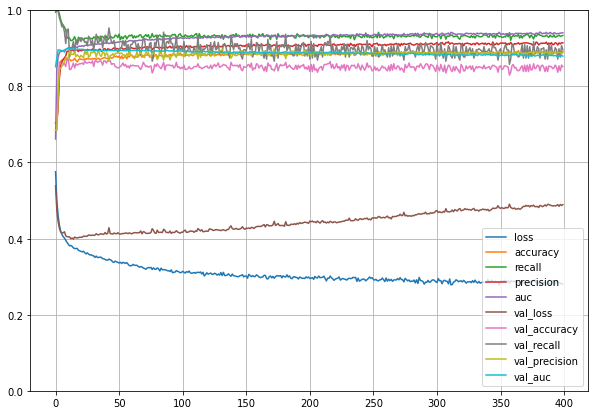

In [12]:
pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

85.79% (+/- 1.07%)
90.03% (+/- 0.77%)
89.18% (+/- 1.13%)
lr=0.001
epochs = 400
    model = Sequential()
    model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))